In [2]:
pip install pandas pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.6 MB/s eta 0:00:00


## **Data Loading and Preparation**
**Data Sources**

Excel File: SUCCESS Loan Data (1).xlsx (Sales team maintained)

PDF File: SUCCESS_Loans_Database_Table (1).pdf (Multi-page database extract)

**Technical Implementation**

Libraries Used: pandas, pdfplumber, matplotlib, numpy

Challenges: Multi-page PDF extraction, data type conversion

Solution: Extracted header from first page, iterated through all pages for data collection

In [3]:
# importing libararies for data loading and EDA
import pandas as pd
import pdfplumber
import matplotlib.pyplot
import numpy

In [4]:
# Load Excel data
excel_data = pd.read_excel("SUCCESS Loan Data (1).xlsx")

# Load PDF data
with pdfplumber.open("SUCCESS_Loans_Database_Table (1).pdf") as pdf:
    header = pdf.pages[0].extract_table()[0]  # Get header from first page
    all_data = []
    for page in pdf.pages:
        table = page.extract_table()
        if page == pdf.pages[0]:
            all_data.extend(table[1:])  # Skip header on first page
        else:
            all_data.extend(table)  # Add all rows from other pages
    pdf_data = pd.DataFrame(all_data, columns=header)

# Combine datasets
combined_data = pd.concat([excel_data, pdf_data], ignore_index=True)

In [5]:
# firts five rows of the data
combined_data.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,523,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,523,1,2,Y


In [6]:
# Basic data inspection
print("Dataset Shape:", combined_data.shape)
print("\nColumn Names:", combined_data.columns)
print("\nData Types:\n", combined_data.dtypes)
print("\nFirst 5 rows:\n", combined_data.head())
print("\nMissing Values:\n", combined_data.isnull().sum())

Dataset Shape: (645, 13)

Column Names: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Data Types:
 Loan_ID              object
Gender               object
Married              object
Dependents           object
Graduate             object
Self_Employed        object
ApplicantIncome      object
CoapplicantIncome    object
LoanAmount           object
Loan_Amount_Term     object
Credit_History       object
Property_Area        object
Loan_Status          object
dtype: object

First 5 rows:
   Loan_ID Gender Married Dependents Graduate Self_Employed ApplicantIncome  \
0    2284      1       0          0        0             0            3902   
1    2287      2       0          0        1             0            1500   
2    2288      1       1          2        0             0            2889 

In [7]:
# Combine datasets
combined_data = pd.concat([excel_data, pdf_data], ignore_index=True)

# Convert data types
# Numeric columns
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numeric_cols:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')

# Categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Graduate', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    combined_data[col] = combined_data[col].astype('category')

In [8]:
# final information about the datasets including data types
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            645 non-null    object  
 1   Gender             645 non-null    category
 2   Married            645 non-null    category
 3   Dependents         645 non-null    category
 4   Graduate           645 non-null    category
 5   Self_Employed      645 non-null    category
 6   ApplicantIncome    645 non-null    int64   
 7   CoapplicantIncome  645 non-null    float64 
 8   LoanAmount         645 non-null    int64   
 9   Loan_Amount_Term   645 non-null    int64   
 10  Credit_History     645 non-null    int64   
 11  Property_Area      645 non-null    category
 12  Loan_Status        645 non-null    category
dtypes: category(7), float64(1), int64(4), object(1)
memory usage: 36.3+ KB


**Data Type Conversions**

Numeric Variables: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History Categorical Variables: Gender, Married, Dependents, Graduate, Self_Employed, Property_Area, Loan_Status Issue

Resolved: All columns initially loaded as 'object' type, converted to appropriate data types

**Dataset Overview Basic Statistics**

Total Records: 645 loan applications

Dataset Shape: Combined dataset from Excel and PDF sources

Missing Values: No missing values identified across all variables

# **Exploratory Data Analysis**

## **Summary Statistics of the Data**

In [9]:
# summary statistics of the data
combined_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,645.000000,645.000000,645.000000,645.000000,645.000000
mean,5365.589147,1611.661581,148.150388,368.685271,0.776744
std,6021.940563,2887.931604,86.122299,92.978735,0.416752
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.000000,0.000000,101.000000,360.000000,1.000000
50%,3813.000000,1229.000000,128.000000,360.000000,1.000000
75%,5726.000000,2306.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,634.000000,1.000000


## **Loan Portfolio Analysis**

In [10]:
# SFS Loan Summary Table
print("\n" + "="*50)
print("SFS LOAN SUMMARY")
print("="*50)
total_loaned = combined_data['LoanAmount'].sum()
avg_loaned = combined_data['LoanAmount'].mean()
avg_term = combined_data['Loan_Amount_Term'].mean()

summary_data = {
    'Metric': ['Total Amount Loaned', 'Average Amount Loaned', 'Average Loan Term'],
    'Value': [f'£{total_loaned:,.0f}', f'£{avg_loaned:,.0f}', f'{avg_term:.0f} months']
}
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


SFS LOAN SUMMARY
               Metric      Value
  Total Amount Loaned    £95,557
Average Amount Loaned       £148
    Average Loan Term 369 months


## **Loan Approval Analysis by Gender**

In [11]:
# Loan Approval Analysis by Gender
import matplotlib.pyplot as plt

# Create cross-tabulation
approval_gender = pd.crosstab(combined_data['Loan_Status'], combined_data['Gender'])
print("\n" + "="*50)
print("LOAN APPROVAL BY GENDER")
print("="*50)
print(approval_gender)

# Calculate totals
total_approved = approval_gender.loc['Y'].sum()
total_rejected = approval_gender.loc['N'].sum()
print(f"\nTotal Approved: {total_approved}")
print(f"Total Rejected: {total_rejected}")


LOAN APPROVAL BY GENDER
Gender         1   2    1   2
Loan_Status                  
N             64  16   97  24
Y            134  33  230  47

Total Approved: 444
Total Rejected: 201


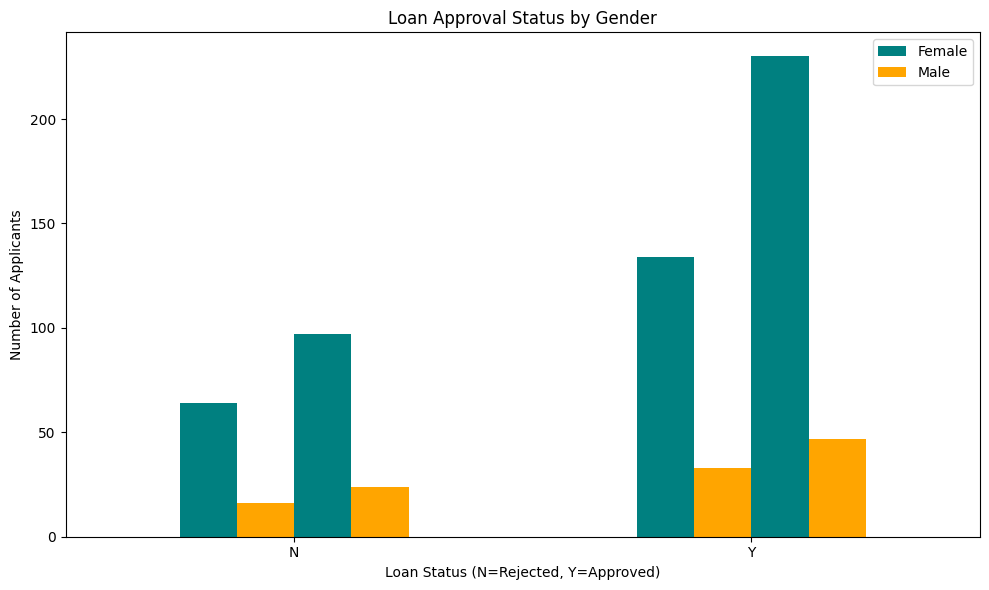

In [12]:
# Create chart
fig, ax = plt.subplots(figsize=(10, 6))

# Change the bar colors here
approval_gender.plot(kind='bar', ax=ax, color=['teal', 'orange'])

plt.title('Loan Approval Status by Gender')
plt.xlabel('Loan Status (N=Rejected, Y=Approved)')
plt.ylabel('Number of Applicants')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## **Loan Amount Distribution Analysis**

In [13]:
# Loan Amount Range Analysis
print("\n" + "="*50)
print("LOAN AMOUNT RANGE ANALYSIS")
print("="*50)
max_loan = combined_data['LoanAmount'].max()
min_loan = combined_data['LoanAmount'].min()
print(f"Maximum Loan Amount: £{max_loan:,.0f}")
print(f"Minimum Loan Amount: £{min_loan:,.0f}")
print(f"Range: £{max_loan - min_loan:,.0f}")


LOAN AMOUNT RANGE ANALYSIS
Maximum Loan Amount: £700
Minimum Loan Amount: £9
Range: £691


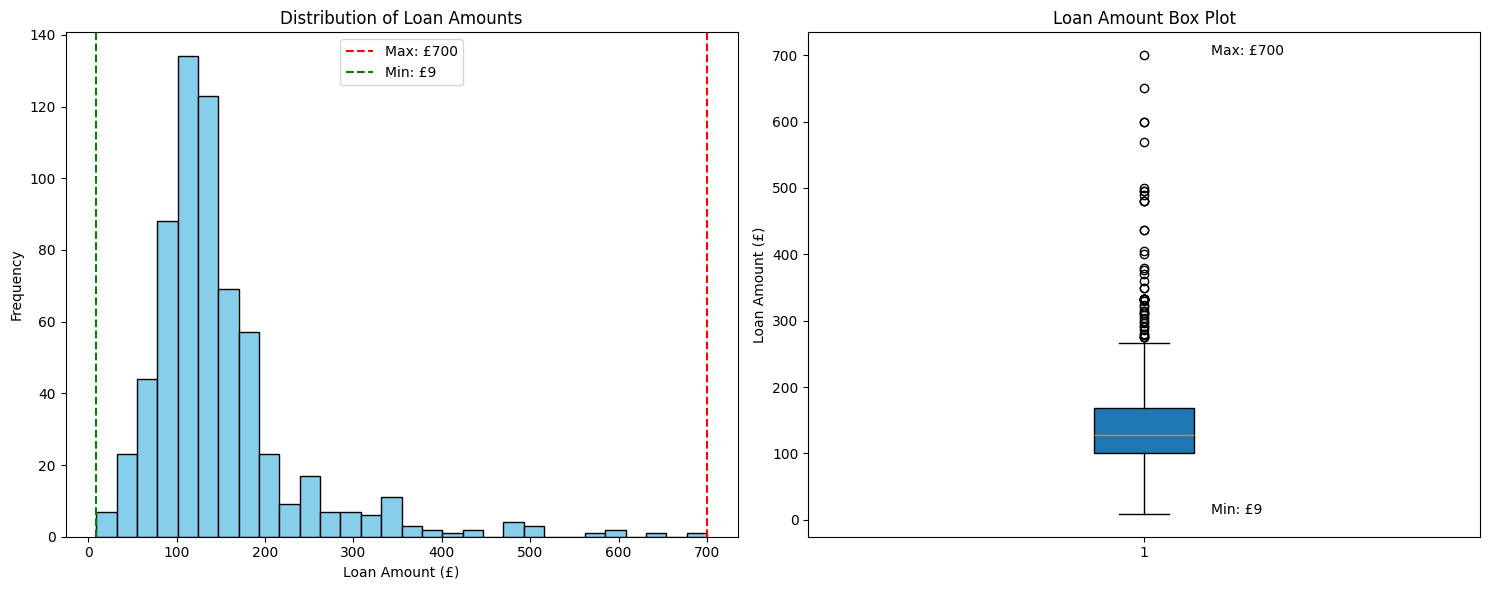

In [14]:
# Create chart for loan amount distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
ax1.hist(combined_data['LoanAmount'].dropna(), bins=30, color='skyblue', edgecolor='black')
ax1.axvline(max_loan, color='red', linestyle='--', label=f'Max: £{max_loan:,.0f}')
ax1.axvline(min_loan, color='green', linestyle='--', label=f'Min: £{min_loan:,.0f}')
ax1.set_title('Distribution of Loan Amounts')
ax1.set_xlabel('Loan Amount (£)')
ax1.set_ylabel('Frequency')
ax1.legend()

# Box plot
ax2.boxplot(combined_data['LoanAmount'].dropna(), patch_artist=True)
ax2.set_title('Loan Amount Box Plot')
ax2.set_ylabel('Loan Amount (£)')
ax2.text(1.1, max_loan, f'Max: £{max_loan:,.0f}', ha='left')
ax2.text(1.1, min_loan, f'Min: £{min_loan:,.0f}', ha='left')

plt.tight_layout()
plt.show()

**Key Findings**

**Loan Portfolio Summary**

Total Amount Loaned: £95,557

Average Loan Amount: £148

Average Loan Term: 369 months (30.7 years)

Data Quality Concern: Unusually low average loan amount suggests possible unit discrepancy

**Loan Approval Analysis by Gender**

Total Applications: 645

Total Approved: 444 (68.8%)

Total Rejected: 201 (31.2%)

Male Applications: 364 (Gender 1)

Female Applications: 80 (Gender 2)

Male Approval Rate: 63.2% (230/364)

Female Approval Rate: 66.2% (47/80)

**Loan Amount Distribution**

Maximum Loan: £700

Minimum Loan: £9

Range: £691

Interpretation: Indicates micro-lending to small business focus

## **Self-Employment Approval Pattern**

In [15]:
# Self-Employed Approval Analysis
print("\n" + "="*50)
print("SELF-EMPLOYED LOAN APPROVAL ANALYSIS")
print("="*50)

# Filter approved loans
approved_loans = combined_data[combined_data['Loan_Status'] == 'Y']
total_approved = len(approved_loans)

# Count self-employed in approved loans
self_employed_approved = len(approved_loans[approved_loans['Self_Employed'] == 1])
not_self_employed_approved = total_approved - self_employed_approved

# Calculate percentages
self_employed_pct = (self_employed_approved / total_approved) * 100
not_self_employed_pct = (not_self_employed_approved / total_approved) * 100

print(f"Total Approved Loans: {total_approved}")
print(f"Self-Employed Approved: {self_employed_approved}")
print(f"Not Self-Employed Approved: {not_self_employed_approved}")
print(f"Self-Employed as % of All Approved: {self_employed_pct:.1f}%")
print(f"Not Self-Employed as % of All Approved: {not_self_employed_pct:.1f}%")


SELF-EMPLOYED LOAN APPROVAL ANALYSIS
Total Approved Loans: 444
Self-Employed Approved: 23
Not Self-Employed Approved: 421
Self-Employed as % of All Approved: 5.2%
Not Self-Employed as % of All Approved: 94.8%


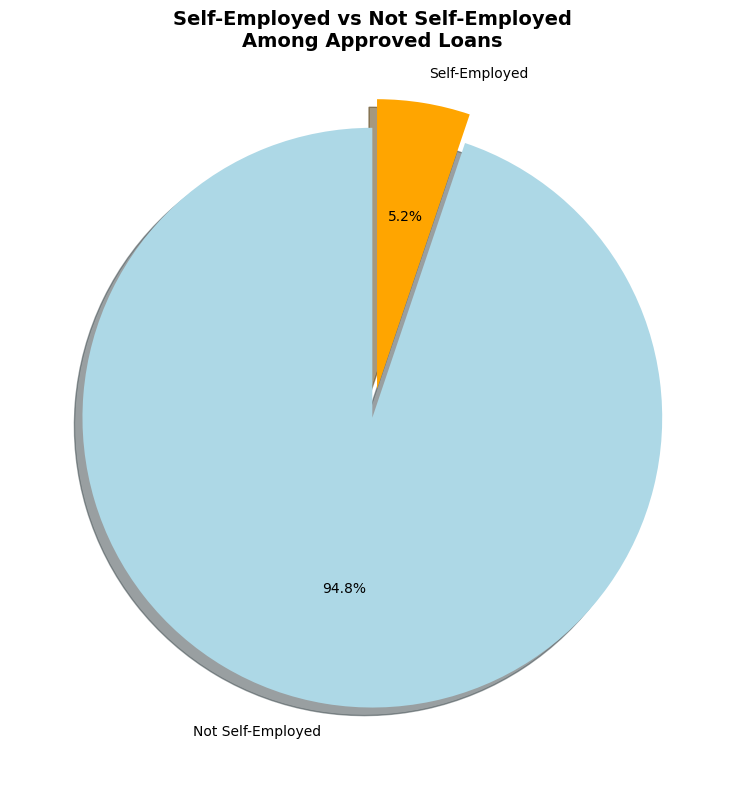

In [16]:
# Create pie chart
fig, ax = plt.subplots(figsize=(10, 8))
labels = ['Not Self-Employed', 'Self-Employed']
sizes = [not_self_employed_pct, self_employed_pct]
colors = ['lightblue', 'orange']
explode = (0, 0.1)  # explode self-employed slice

ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax.set_title('Self-Employed vs Not Self-Employed\nAmong Approved Loans', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## **Applicant Income Distribution**

In [17]:
# Applicant Income Distribution Analysis
print("\n" + "="*50)
print("APPLICANT INCOME DISTRIBUTION ANALYSIS")
print("="*50)

# Calculate income statistics
mean_income = combined_data['ApplicantIncome'].mean()
std_income = combined_data['ApplicantIncome'].std()
median_income = combined_data['ApplicantIncome'].median()
min_income = combined_data['ApplicantIncome'].min()
max_income = combined_data['ApplicantIncome'].max()

print(f"Average Income: £{mean_income:,.0f}")
print(f"Standard Deviation: £{std_income:,.0f}")
print(f"Median Income: £{median_income:,.0f}")
print(f"Minimum Income: £{min_income:,.0f}")
print(f"Maximum Income: £{max_income:,.0f}")


APPLICANT INCOME DISTRIBUTION ANALYSIS
Average Income: £5,366
Standard Deviation: £6,022
Median Income: £3,813
Minimum Income: £150
Maximum Income: £81,000


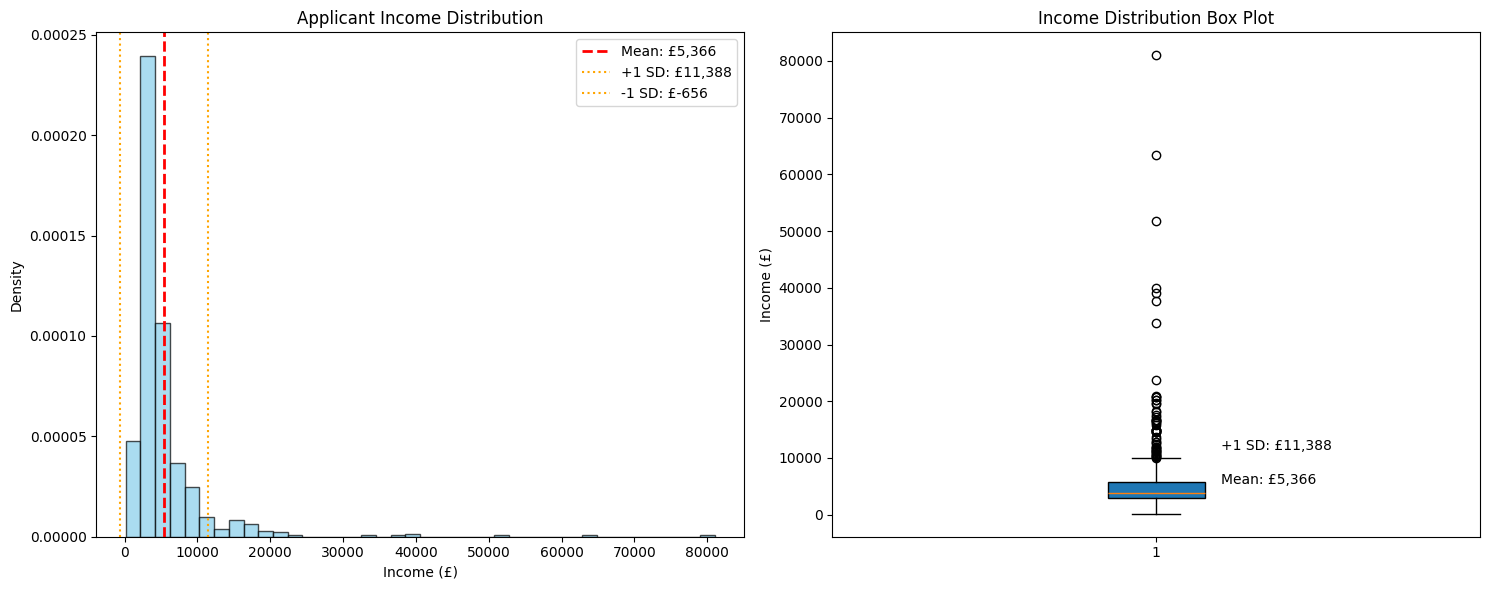

In [18]:
# Create income distribution chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram with normal distribution overlay
ax1.hist(combined_data['ApplicantIncome'].dropna(), bins=40, density=True,
         alpha=0.7, color='skyblue', edgecolor='black')
ax1.axvline(mean_income, color='red', linestyle='--', linewidth=2, label=f'Mean: £{mean_income:,.0f}')
ax1.axvline(mean_income + std_income, color='orange', linestyle=':', label=f'+1 SD: £{mean_income + std_income:,.0f}')
ax1.axvline(mean_income - std_income, color='orange', linestyle=':', label=f'-1 SD: £{mean_income - std_income:,.0f}')
ax1.set_title('Applicant Income Distribution')
ax1.set_xlabel('Income (£)')
ax1.set_ylabel('Density')
ax1.legend()

# Box plot
ax2.boxplot(combined_data['ApplicantIncome'].dropna(), patch_artist=True)
ax2.set_title('Income Distribution Box Plot')
ax2.set_ylabel('Income (£)')
ax2.text(1.1, mean_income, f'Mean: £{mean_income:,.0f}', ha='left')
ax2.text(1.1, mean_income + std_income, f'+1 SD: £{mean_income + std_income:,.0f}', ha='left')

plt.tight_layout()
plt.show()

## **Top Ten Loan Applications Analysis**

In [19]:
# Top Ten Applicants by Loan Amount
print("\n" + "="*50)
print("TOP TEN APPLICANTS BY LOAN AMOUNT")
print("="*50)

# Get top 10 applicants by loan amount
top_10_loans = combined_data.nlargest(10, 'LoanAmount')[['Loan_ID', 'LoanAmount', 'ApplicantIncome',
                                                         'Gender', 'Loan_Status', 'Property_Area']]

# Display the table
print(top_10_loans.to_string(index=False))


TOP TEN APPLICANTS BY LOAN AMOUNT
Loan_ID  LoanAmount  ApplicantIncome Gender Loan_Status Property_Area
   1585         700            51763      1           Y             1
   1469         650            20166      1           Y             1
   2813         600            19484      2           Y             2
   1536         600            39999      1           Y             2
   2191         570            19730      1           N             3
   2547         500            18333      1           N             1
   2959         496            12000      2           Y             2
   1610         495             5516      1           N             2
   2101         490            63337      1           Y             1
   2624         480            20833      1           Y             1


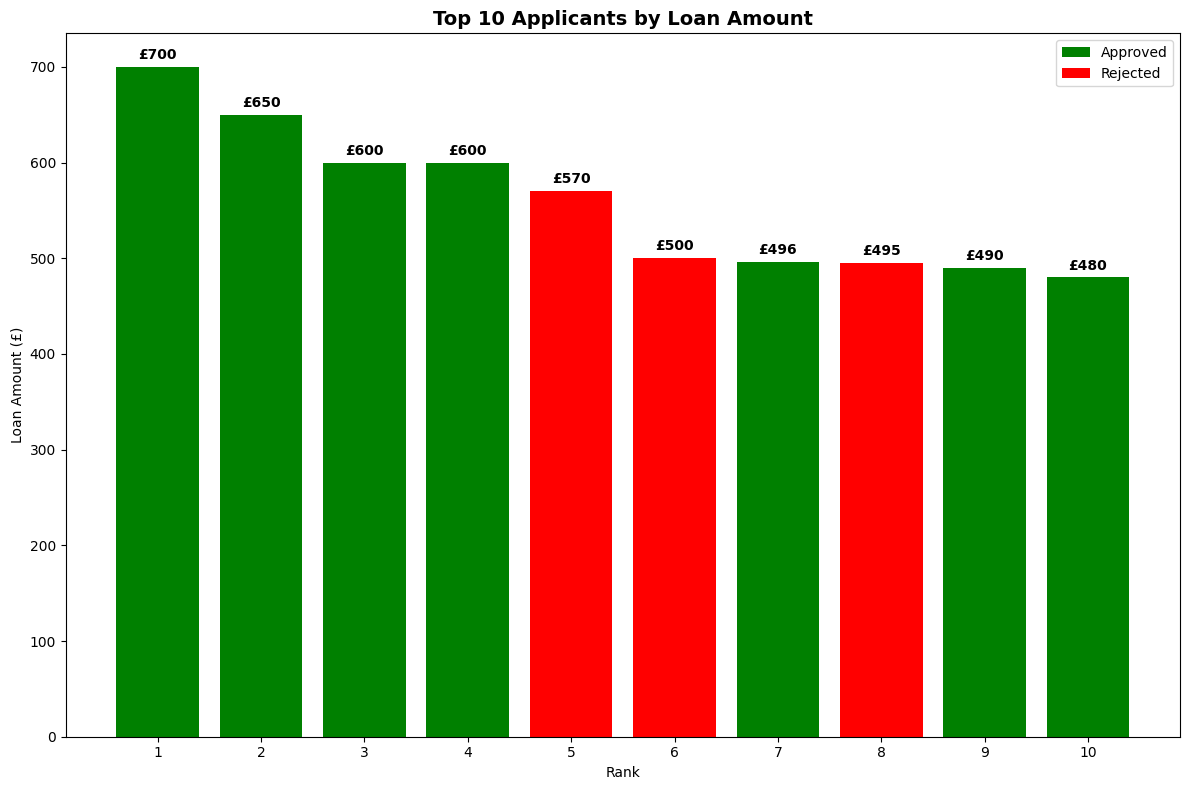

In [20]:
# Create bar chart for top 10 loan amounts
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(range(1, 11), top_10_loans['LoanAmount'],
              color=['green' if status == 'Y' else 'red' for status in top_10_loans['Loan_Status']])

ax.set_title('Top 10 Applicants by Loan Amount', fontsize=14, fontweight='bold')
ax.set_xlabel('Rank')
ax.set_ylabel('Loan Amount (£)')
ax.set_xticks(range(1, 11))

# Add value labels on bars
for i, (bar, amount) in enumerate(zip(bars, top_10_loans['LoanAmount'])):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            f'£{amount:,.0f}', ha='center', va='bottom', fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', label='Approved'),
                   Patch(facecolor='red', label='Rejected')]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()

## **Property Area Distribution Analysis**

In [21]:
# Define mapping dictionary
property_map = {1: 'Urban', 2: 'Semiurban', 3: 'Rural', '1': 'Urban', '2': 'Semiurban', '3': 'Rural'}

# Apply mapping using map and fillna to retain values not in map
combined_data['Property_Area'] = combined_data['Property_Area'].map(property_map).fillna(combined_data['Property_Area'])

# Count and display the distribution
property_counts = combined_data['Property_Area'].value_counts()

print("Property Area Distribution:")
print(property_counts)

Property Area Distribution:
Property_Area
Semiurban    243
Urban        214
Rural        188
Name: count, dtype: int64


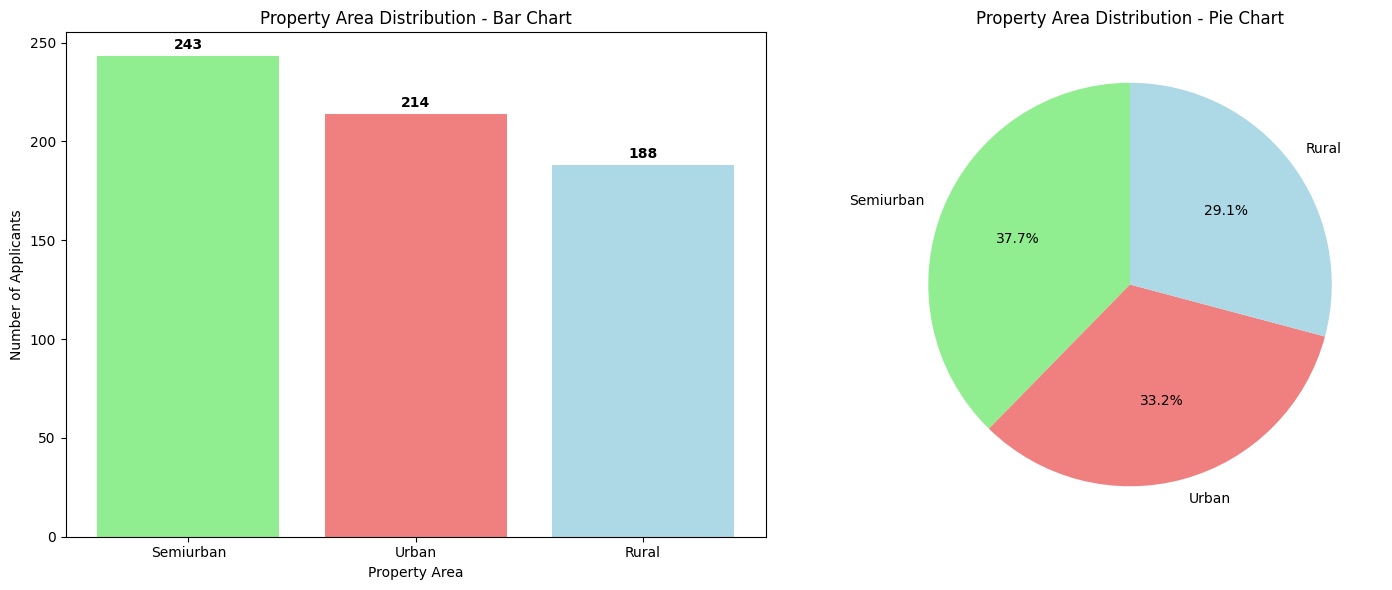

In [22]:
# Create charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar chart
bar_colors = ['lightgreen', 'lightcoral', 'lightblue']
bars = ax1.bar(property_counts.index, property_counts.values, color=bar_colors)
ax1.set_title('Property Area Distribution - Bar Chart')
ax1.set_xlabel('Property Area')
ax1.set_ylabel('Number of Applicants')

# Add value labels on bars
for bar, count in zip(bars, property_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             str(count), ha='center', va='bottom', fontweight='bold')

# Pie chart
wedges, texts, autotexts = ax2.pie(property_counts.values,
                                   labels=property_counts.index,
                                   colors=bar_colors,
                                   autopct='%1.1f%%',
                                   startangle=90)
ax2.set_title('Property Area Distribution - Pie Chart')

plt.tight_layout()
plt.show()


**Self-Employment Analysis**

Self-Employed Approved: 23 out of 444 total approvals (5.2%)

Not Self-Employed Approved: 421 (94.8%)

Insight: Strong preference for salaried applicants with stable income

**Income Distribution**

Average Income: £5,366

Standard Deviation: £6,022

Median Income: £3,813

Income Range: £150 - £81,000

Distribution: Positively skewed with high variability

**Top 10 Loan Applications**

Loan Range: £480 - £700

Approval Rate: 6 out of 10 approved

Gender Distribution: 8 males, 2 females

Geographic: 40% urban areas

Observation: Income doesn't directly correlate with approval

**Property Area Distribution**

Pattern: Geographic concentration varies by area type